In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [104]:
Products = pd.read_csv('CleanedDataSets/products_c.csv')

In [8]:
p_id = Products['product_name']
features = Products[[
    'total_orders',
    'total_revenue',
    'price_per_order',
    'average_frequency',
    'review_score'
]]

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

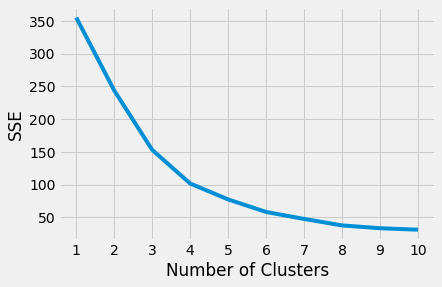

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [48]:
kmeans = KMeans(
  init="random",
  n_clusters=4,
  n_init=30,
  max_iter=500,
  random_state=42
)
kmeans.fit(scaled_features)
sse.append(kmeans.inertia_)

In [105]:
Products['cluster'] = kmeans.labels_

In [106]:
clusters = {'cluster': [0,1,2,3]}
clusters = pd.DataFrame(data=clusters)

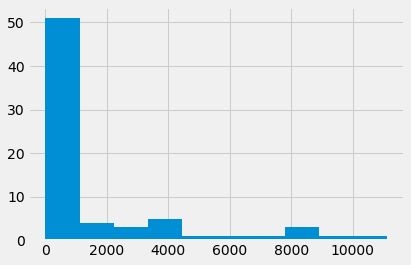

In [107]:
Products['total_orders'].hist()

In [108]:
total_orders = pd.DataFrame(Products.groupby(by='cluster')['total_orders'].sum().reset_index())
clusters = clusters.set_index('cluster').join(total_orders.set_index('cluster')).reset_index()

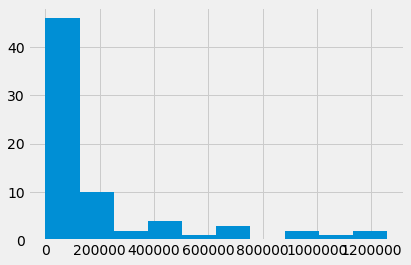

In [109]:
Products['total_revenue'].hist()

In [110]:
total_revenue = pd.DataFrame(Products.groupby(by='cluster')['total_revenue'].sum().reset_index())
clusters = clusters.set_index('cluster').join(total_revenue.set_index('cluster')).reset_index()

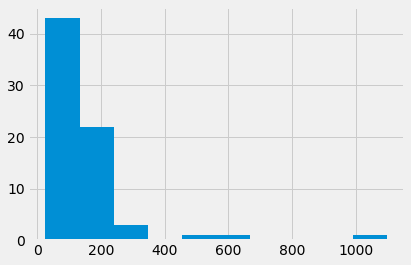

In [111]:
Products['price_per_order'].hist()

In [112]:
price_per_order = pd.DataFrame(Products.groupby(by='cluster')['price_per_order'].median().reset_index())
clusters = clusters.set_index('cluster').join(price_per_order.set_index('cluster')).reset_index()

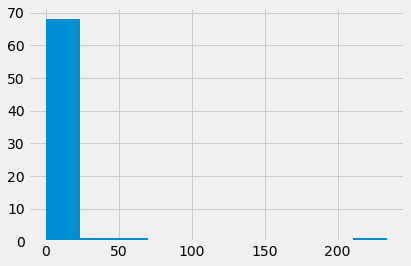

In [113]:
Products['average_frequency'].hist()

In [114]:
average_frequency = pd.DataFrame(Products.groupby(by='cluster')['average_frequency'].median().reset_index())
clusters = clusters.set_index('cluster').join(average_frequency.set_index('cluster')).reset_index()

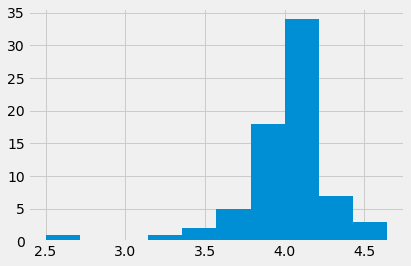

In [115]:
Products['review_score'].hist()

In [116]:
review_score = pd.DataFrame(Products.groupby(by='cluster')['review_score'].mean().reset_index())
clusters = clusters.set_index('cluster').join(review_score.set_index('cluster')).reset_index()

In [117]:
# Transpose cluster dataframe and save it into <cluster_info>
clusters.set_index('cluster')
cluster_info = clusters.T

In [118]:
cluster_info

,0,1,2,3
cluster,0.000000e+00,1.000000,2.000,3.000000e+00
total_orders,7.503700e+04,517.000000,2.000,3.546600e+04
total_revenue,8.959904e+06,383726.580000,283.290,4.060746e+06
price_per_order,1.165139e+02,624.285658,141.645,1.061782e+02
average_frequency,1.795203e-02,2.490099,234.000,2.162558e+00
review_score,4.024061e+00,4.191732,2.500,4.025757e+00


In [119]:
Products.loc[Products.cluster==0]

,Unnamed: 0,product_name,total_orders,total_revenue,price_per_order,average_frequency,review_score,cluster
8,8,auto,4235,592720.11,139.957523,0.032357,4.037491,0
11,11,health_beauty,9670,1258681.34,130.163531,0.012411,4.122342,0
12,12,toys,4117,483946.60,117.548360,0.030855,4.138835,0
13,13,bed_bath_table,11115,1036988.68,93.296327,0.009358,3.870642,0
26,26,cool_stuff,3796,635290.85,167.357969,0.036364,4.130755,0
32,32,sports_leisure,8641,988048.97,114.344285,0.012153,4.091854,0
40,40,garden_tools,4347,485256.46,111.630196,0.032674,4.028932,0
44,44,computers_accessories,7827,911954.32,116.513903,0.014822,3.917568,0
54,54,furniture_decor,8334,729762.49,87.564494,0.015001,3.885905,0
64,64,watches_gifts,5991,1205005.68,201.135984,0.024040,4.001334,0


In [120]:
# Save to clean products clusters DS
cluster_info.to_csv('CleanedDatasets/cluster_products.csv')
Products.to_csv('CleanedDataSets/ProductsClustering.csv')